## EDA JUST FOR PURCHASE_ORDERS

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
df_receivals = pd.read_csv(r'C:\Users\bupat\OneDrive\Documentos\NTNU\modern_ml_in_practice\append_consulting_project\data\kernel\processed_receivals.csv')
df_purchase = pd.read_csv(r'C:\Users\bupat\OneDrive\Documentos\NTNU\modern_ml_in_practice\append_consulting_project\data\kernel\purchase_orders.csv')

## INFO

In [140]:
df_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33171 entries, 0 to 33170
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   purchase_order_id       33171 non-null  int64  
 1   purchase_order_item_no  33171 non-null  int64  
 2   quantity                33171 non-null  float64
 3   delivery_date           33171 non-null  object 
 4   product_id              33171 non-null  int64  
 5   product_version         33171 non-null  int64  
 6   created_date_time       33171 non-null  object 
 7   modified_date_time      32679 non-null  object 
 8   unit_id                 33127 non-null  float64
 9   unit                    33127 non-null  object 
 10  status_id               33171 non-null  int64  
 11  status                  33171 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 3.0+ MB


## DROP NON-INTUITIONAL OR FEATURES WITH NA OR FEATURES THAT ALREADY HAVE INDEXED FEATURES AND DO NOT NEED FURTHER CHANGES

In [141]:
# drop modified_date as it has too many NA values
df_purchase = df_purchase.drop(columns=['modified_date_time', 'status', 'created_date_time'])
df_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33171 entries, 0 to 33170
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   purchase_order_id       33171 non-null  int64  
 1   purchase_order_item_no  33171 non-null  int64  
 2   quantity                33171 non-null  float64
 3   delivery_date           33171 non-null  object 
 4   product_id              33171 non-null  int64  
 5   product_version         33171 non-null  int64  
 6   unit_id                 33127 non-null  float64
 7   unit                    33127 non-null  object 
 8   status_id               33171 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 2.3+ MB


## GETTING THESE FEATURES TO DF_RECEIVALS AS NOW NO ROWS HAVE NA VALUES

In [142]:
# Keys to merge on
key_cols = ['purchase_order_id', 'purchase_order_item_no', 'product_id']

# Convert df_receivals key columns to int64 to match df_purchase
for col in key_cols:
    df_receivals[col] = df_receivals[col].astype(int)
    df_purchase[col] = df_purchase[col].astype(int)

# Columns to bring from df_purchase
cols_to_merge = key_cols + ['quantity', 'delivery_date', 'product_version', 'unit_id', 'unit', 'status_id']

# Merge df_purchase onto df_receivals
df_receivals = df_receivals.merge(
    df_purchase[cols_to_merge],
    on=key_cols,
    how='left'
)

df_receivals.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60796 entries, 0 to 60795
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rm_id                   60796 non-null  float64
 1   product_id              60796 non-null  int64  
 2   purchase_order_id       60796 non-null  int64  
 3   purchase_order_item_no  60796 non-null  int64  
 4   receival_item_no        60796 non-null  int64  
 5   batch_id                48785 non-null  float64
 6   date_arrival            60796 non-null  object 
 7   receival_status         60796 non-null  int64  
 8   net_weight              60796 non-null  float64
 9   supplier_id             60796 non-null  int64  
 10  day_of_year             60796 non-null  int64  
 11  month                   60796 non-null  int64  
 12  year                    60796 non-null  int64  
 13  purchase_prob           60796 non-null  float64
 14  quantity                60699 non-null

## EVALUATE IF DELIVERY_DATE IS EQUAL TO DATE_ARRIVAL ON EACH ROW. OBS: HAVE TO REMOVE TIMEZONE AND TIME FROM DELIVERY_DATE, ONLY WANT DATE ON THAT.

In [143]:
# Convert delivery_date to datetime, remove timezone, and keep only date
df_receivals['delivery_date'] = pd.to_datetime(
    df_receivals['delivery_date'], errors='coerce', utc=True
).dt.tz_convert(None).dt.date

# Convert date_arrival to datetime and take only date (if not already)
df_receivals['date_arrival'] = pd.to_datetime(
    df_receivals['date_arrival'], errors='coerce'
).dt.date

# Compare
df_receivals['delivery_equals_arrival'] = df_receivals['delivery_date'] == df_receivals['date_arrival']

# Check results
print(df_receivals[['delivery_date', 'date_arrival', 'delivery_equals_arrival']].head())
print(f"Number of matching dates: {df_receivals['delivery_equals_arrival'].sum()} / {len(df_receivals)}")



  delivery_date date_arrival  delivery_equals_arrival
0    2012-03-14   2012-03-15                    False
1    2012-05-01   2012-05-04                    False
2    2012-07-18   2012-07-26                    False
3    2012-09-24   2012-09-03                    False
4    2012-11-27   2012-11-28                    False
Number of matching dates: 2336 / 60796


## DROP DELIVERY_DATE

In [144]:
# drop delivery_date
df_receivals = df_receivals.drop(columns=['delivery_date', 'delivery_equals_arrival'])
df_receivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60796 entries, 0 to 60795
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rm_id                   60796 non-null  float64
 1   product_id              60796 non-null  int64  
 2   purchase_order_id       60796 non-null  int64  
 3   purchase_order_item_no  60796 non-null  int64  
 4   receival_item_no        60796 non-null  int64  
 5   batch_id                48785 non-null  float64
 6   date_arrival            60796 non-null  object 
 7   receival_status         60796 non-null  int64  
 8   net_weight              60796 non-null  float64
 9   supplier_id             60796 non-null  int64  
 10  day_of_year             60796 non-null  int64  
 11  month                   60796 non-null  int64  
 12  year                    60796 non-null  int64  
 13  purchase_prob           60796 non-null  float64
 14  quantity                60699 non-null

## SHOW ALL THE ROWS THAT HAVE NULL VALUES 

In [145]:
# Rows with any null values
null_rows = df_receivals[df_receivals.isnull().any(axis=1)]

# Show them
print(null_rows)


        rm_id  product_id  purchase_order_id  purchase_order_item_no  \
0      2123.0        1177             249859                      10   
1      2123.0        1177             250342                      10   
2      2123.0        1177             251961                      10   
3      2123.0        1177             252967                      10   
4      2123.0        1177             254245                      10   
...       ...         ...                ...                     ...   
60496  3883.0    91900471             321317                      30   
60673  3901.0    91901440             329980                      10   
60759  4401.0    91901370             327819                      10   
60760  4401.0    91901370             327819                      20   
60761  4401.0    91901370             327819                      30   

       receival_item_no   batch_id date_arrival  receival_status  net_weight  \
0                     1        NaN   2012-03-15        

## REMOVE UNIT AND UNIT_ID AS THEY ALL JUST SHOW KG ANYWAYS

In [146]:
# DROP UNIT AND UNIT_ID AS THEY ALL JUST SHOW KG ANYWAYS
df_receivals = df_receivals.drop(columns=['unit', 'unit_id'])
df_receivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60796 entries, 0 to 60795
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rm_id                   60796 non-null  float64
 1   product_id              60796 non-null  int64  
 2   purchase_order_id       60796 non-null  int64  
 3   purchase_order_item_no  60796 non-null  int64  
 4   receival_item_no        60796 non-null  int64  
 5   batch_id                48785 non-null  float64
 6   date_arrival            60796 non-null  object 
 7   receival_status         60796 non-null  int64  
 8   net_weight              60796 non-null  float64
 9   supplier_id             60796 non-null  int64  
 10  day_of_year             60796 non-null  int64  
 11  month                   60796 non-null  int64  
 12  year                    60796 non-null  int64  
 13  purchase_prob           60796 non-null  float64
 14  quantity                60699 non-null

## USE MICE TO FILL THE MISSING VALUES

In [147]:
#from sklearn.experimental import enable_iterative_imputer  # noqa: F401
#from sklearn.impute import IterativeImputer
#import numpy as np

# Define and apply the imputer
#imputer = IterativeImputer(random_state=0)
#imputed_data = imputer.fit_transform(df_receivals[['quantity', 'product_version', 'status_id']])

# Assign imputed values back
#df_receivals[['quantity', 'product_version', 'status_id']] = imputed_data

# ✅ Round all three columns to nearest whole number but keep as float
#cols_to_round = ['quantity', 'product_version', 'status_id']
#df_receivals[cols_to_round] = np.round(df_receivals[cols_to_round], 0).astype(float)

# Check result
#df_receivals.info()

## DROP ROWS WITH NA VALUES

In [148]:
# DROP ROWS WITH NA VALUES
df_receivals = df_receivals.dropna()
df_receivals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48747 entries, 18 to 60795
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rm_id                   48747 non-null  float64
 1   product_id              48747 non-null  int64  
 2   purchase_order_id       48747 non-null  int64  
 3   purchase_order_item_no  48747 non-null  int64  
 4   receival_item_no        48747 non-null  int64  
 5   batch_id                48747 non-null  float64
 6   date_arrival            48747 non-null  object 
 7   receival_status         48747 non-null  int64  
 8   net_weight              48747 non-null  float64
 9   supplier_id             48747 non-null  int64  
 10  day_of_year             48747 non-null  int64  
 11  month                   48747 non-null  int64  
 12  year                    48747 non-null  int64  
 13  purchase_prob           48747 non-null  float64
 14  quantity                48747 non-null  fl

## BOX-PLOTS

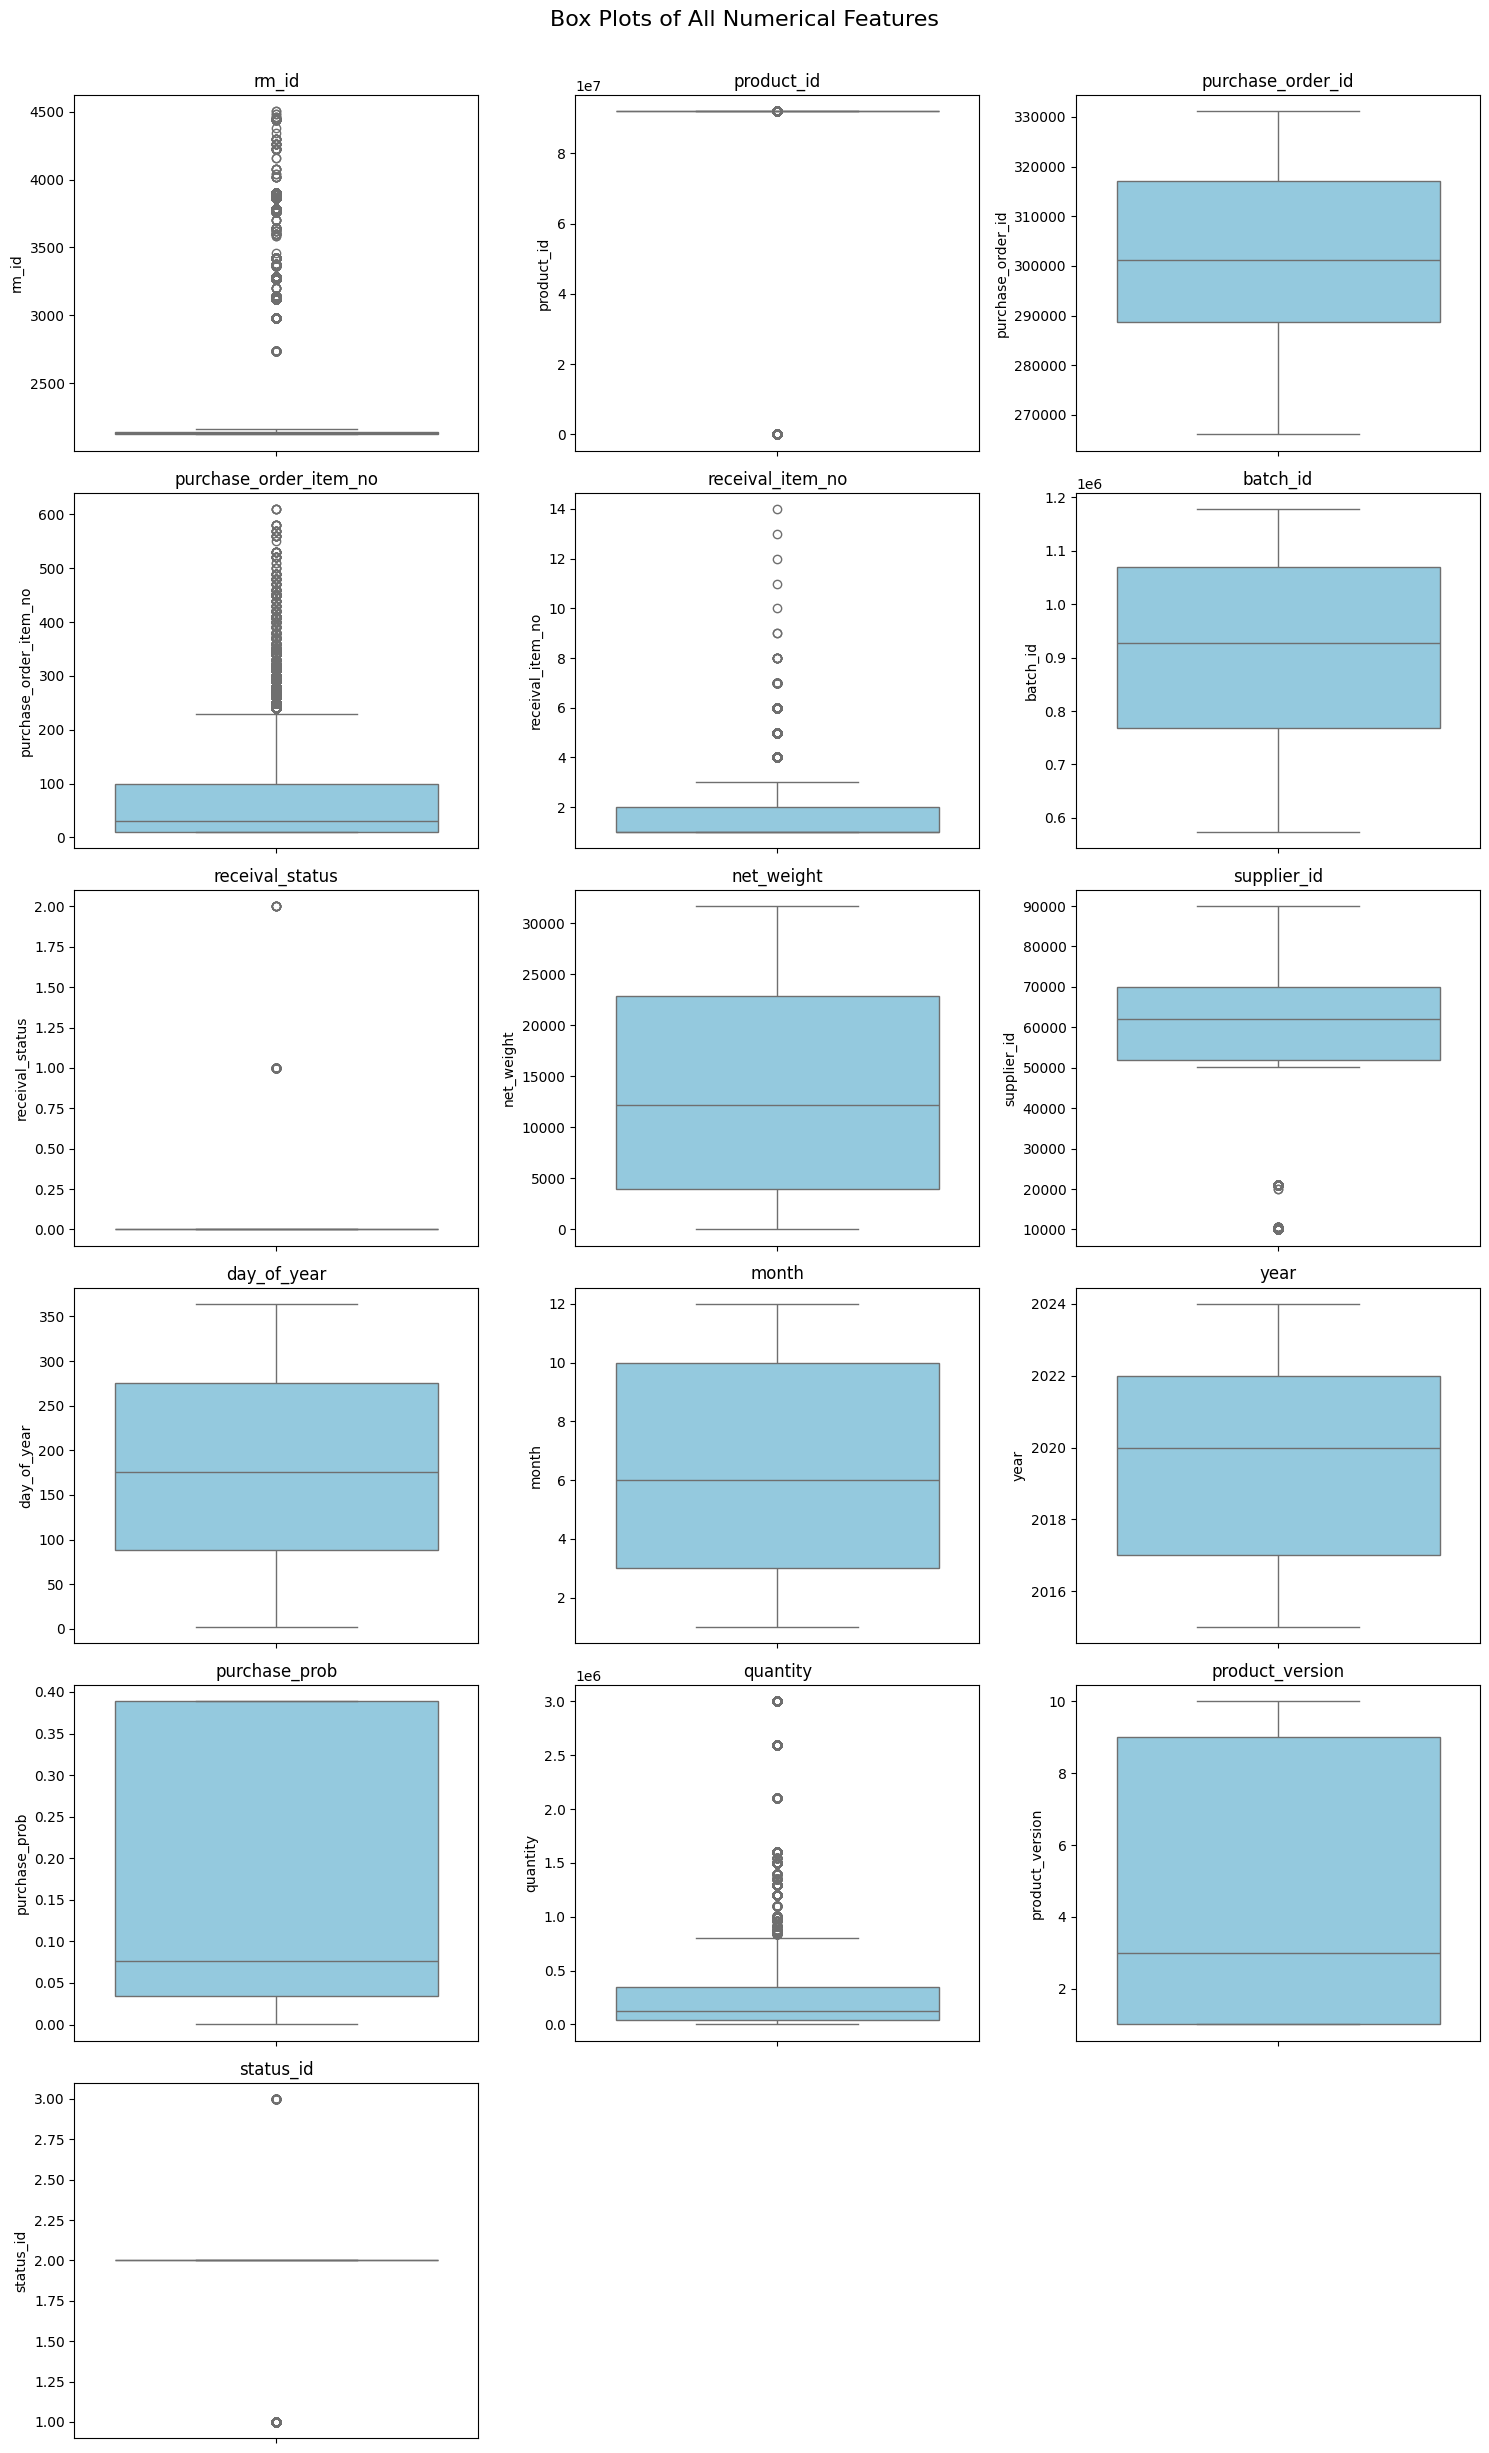

In [149]:
# Select numerical features
numeric_cols = df_receivals.select_dtypes(include='number').columns

# Grid size
n_cols = 3  # number of plots per row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # ceil division

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df_receivals[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Box Plots of All Numerical Features", fontsize=16, y=1.02)
plt.show()

## CORRELATION FOR NUMERICAL FEATURES

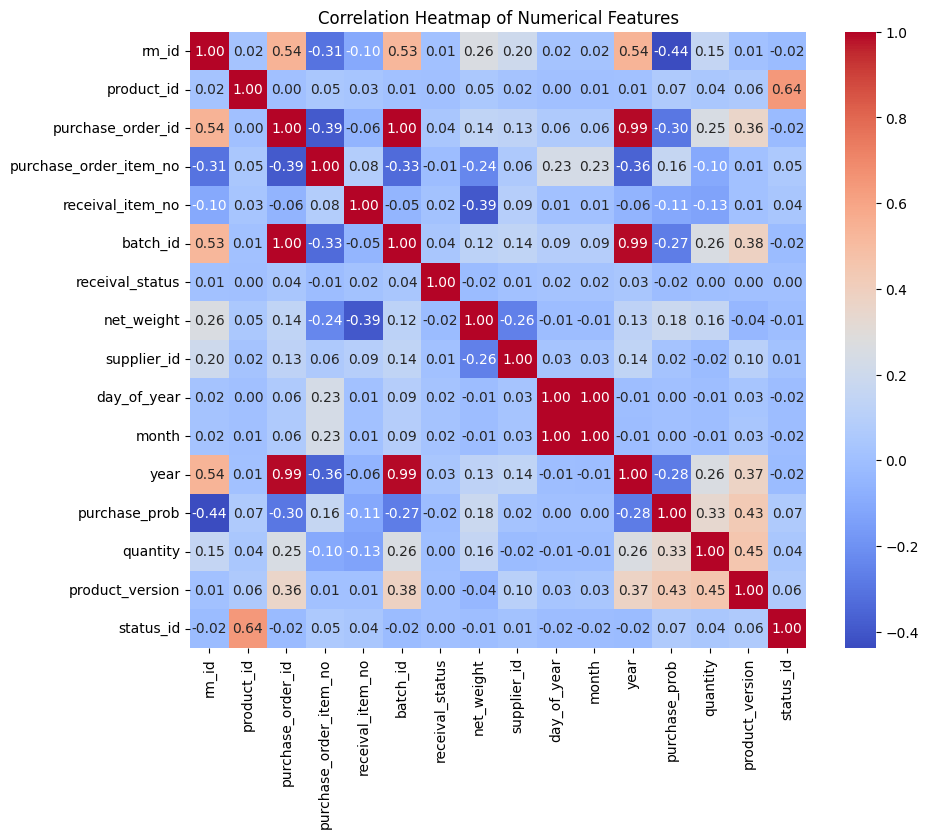

In [150]:
# correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df_receivals[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


## SAVE TO CSV

In [151]:
# SAVE TO CSV
df_receivals.to_csv(r'C:\Users\bupat\OneDrive\Documentos\NTNU\modern_ml_in_practice\append_consulting_project\data\kernel\purchase_receivals.csv')